<h1>Credit Card Fraud Detection 2023 Dataset Modeling</h1>

Objectives: Applying the following model to detect Credit Card Fraud.
- `Logistic regression`
- `Decision tree classifier`
- `Random forest classifier`
- `Multilayer perceptron classifier`

# Preparation

## Setup SparkSession

In [1]:
!apt-get install openjdk-8-jdk-headless
!wget https://dlcdn.apache.org/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz
!tar xf spark-3.5.1-bin-hadoop3.tgz
!pip install findspark

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra fonts-nanum fonts-ipafont-gothic
  fonts-ipafont-mincho fonts-wqy-microhei fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 39.7 MB of archives.
After this operation, 144 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 openjdk-8-jre-headless amd64 8u402-ga-2ubuntu1~22.04 [30.8 MB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 openjdk-8-jdk-headless amd64 8u402-ga-2ubuntu1~22.04 [8,873 kB]

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.1-bin-hadoop3"

In [3]:
import findspark
findspark.init()

In [4]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("local[*]").getOrCreate()
spark

In [5]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

## Upload the preprocessed dataset and load it

In [6]:
!gdown https://drive.google.com/uc?id=1cgGYsui4NogY2KpQHZSnS2w-gJ64n0vV -O creditcard_2023_preprocessed.csv

Downloading...
From (original): https://drive.google.com/uc?id=1cgGYsui4NogY2KpQHZSnS2w-gJ64n0vV
From (redirected): https://drive.google.com/uc?id=1cgGYsui4NogY2KpQHZSnS2w-gJ64n0vV&confirm=t&uuid=b4780868-a1fe-4708-b6c7-52cd738ea67e
To: /content/creditcard_2023_preprocessed.csv
100% 248M/248M [00:01<00:00, 136MB/s]


In [7]:
df = spark.read.csv("creditcard_2023_preprocessed.csv", header = True, inferSchema = True)
df.show(3)

+--------------------+-------------------+------------------+--------------------+-------------------+-------------------+------------------+-------------------+-------------------+------------------+-------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+-------------------+--------------------+--------------------+-----+
|                  V1|                 V2|                V3|                  V4|                 V5|                 V6|                V7|                 V8|                 V9|               V10|                V11|               V12|               V14|                V16|                V17|                V18|                V19|                V20|                 V21|                V24|                 V27|                 V28|Class|
+--------------------+-------------------+------------------+--------------------+-------------------+--

## Train - test split

In [8]:
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col

assembler = VectorAssembler(inputCols= df.columns[0:22], outputCol = "features")
df_assembled = assembler.transform(df)
df_final = df_assembled.select(col("features"), col("Class").alias("label"))

In [9]:
train, test = df_final.randomSplit([0.75, 0.25], seed = 200)

# 1. Logistic Regression

Train

In [10]:
from pyspark.ml.classification import LogisticRegression

#default
lr = LogisticRegression(labelCol = "label", featuresCol = "features", maxIter=100)
lrm = lr.fit(train)
predictions_lr = lrm.transform(test)
predictions_lr.show(5)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[-3.2185342708315...|    0|[18.2174666768860...|[0.99999998774665...|       0.0|
|[-2.9960414574330...|    0|[22.9136821189561...|[0.99999999988812...|       0.0|
|[-2.8478753009614...|    0|[20.8517348679275...|[0.99999999912055...|       0.0|
|[-2.7525361764288...|    0|[7.62775675973381...|[0.99951348527658...|       0.0|
|[-2.7110079759018...|    0|[4.01630711895551...|[0.98229956528970...|       0.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows



In [11]:
#max iter = 500
lr_1 = LogisticRegression(labelCol = "label", featuresCol = "features", maxIter=500)
lrm_1 = lr_1.fit(train)
predictions_lr_1 = lrm_1.transform(test)
predictions_lr_1.show(5)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[-3.2185342708315...|    0|[18.2174666768860...|[0.99999998774665...|       0.0|
|[-2.9960414574330...|    0|[22.9136821189561...|[0.99999999988812...|       0.0|
|[-2.8478753009614...|    0|[20.8517348679275...|[0.99999999912055...|       0.0|
|[-2.7525361764288...|    0|[7.62775675973381...|[0.99951348527658...|       0.0|
|[-2.7110079759018...|    0|[4.01630711895551...|[0.98229956528970...|       0.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows



In [12]:
#regParam = 0.1, elasticNetParam = 0(Ridge regression, L2 penalty)
lr_2 = LogisticRegression(labelCol = "label", featuresCol = "features", maxIter = 100, regParam = 0.1, elasticNetParam = 0)
lrm_2 = lr_2.fit(train)
predictions_lr_2 = lrm_2.transform(test)
predictions_lr_2.show(5)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[-3.2185342708315...|    0|[6.806716760627,-...|[0.99889490333517...|       0.0|
|[-2.9960414574330...|    0|[7.69690373103195...|[0.99954597480203...|       0.0|
|[-2.8478753009614...|    0|[6.19837933931903...|[0.99797140125658...|       0.0|
|[-2.7525361764288...|    0|[4.77842091354179...|[0.99166085862110...|       0.0|
|[-2.7110079759018...|    0|[2.64939076847231...|[0.93397343092239...|       0.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows



In [13]:
#regParam = 0.1, elasticNetParam = 1(LASSO - Least Absolute Shrinkage and Selection Operator, L1 penalty)
lr_3 = LogisticRegression(labelCol = "label", featuresCol = "features", maxIter = 100, regParam = 0.1, elasticNetParam = 1)
lrm_3 = lr_3.fit(train)
predictions_lr_3 = lrm_3.transform(test)
predictions_lr_3.show(5)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[-3.2185342708315...|    0|[2.13638739279812...|[0.89438986161146...|       0.0|
|[-2.9960414574330...|    0|[-0.1637534119288...|[0.45915288314933...|       1.0|
|[-2.8478753009614...|    0|[1.28184108925445...|[0.78276300757265...|       0.0|
|[-2.7525361764288...|    0|[1.21098906175320...|[0.77047390534051...|       0.0|
|[-2.7110079759018...|    0|[-0.1553872497452...|[0.46123116295879...|       1.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows



In [14]:
#regParam = 0.1, elasticNetParam = 0.6(Elastic net, L1+L2 penalty)
lr_4 = LogisticRegression(labelCol = "label", featuresCol = "features", maxIter = 100, regParam = 0.1, elasticNetParam = 0.6)
lrm_4 = lr_4.fit(train)
predictions_lr_4 = lrm_4.transform(test)
predictions_lr_4.show(5)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[-3.2185342708315...|    0|[1.70935787678792...|[0.84675297935561...|       0.0|
|[-2.9960414574330...|    0|[-0.6481867546902...|[0.34339826426503...|       1.0|
|[-2.8478753009614...|    0|[0.36428849167571...|[0.59007815911776...|       0.0|
|[-2.7525361764288...|    0|[1.34076654182857...|[0.79261597070098...|       0.0|
|[-2.7110079759018...|    0|[-0.4278980163708...|[0.39462837739266...|       1.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows



Test

In [15]:
#default res
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")
accuracy_LogisticRegression = evaluator.evaluate(predictions_lr)
print("Accuracy Logistic Regression default: {}".format(accuracy_LogisticRegression))
print("Test Error Logistic Regression default: {}".format(1.0 - accuracy_LogisticRegression))

Accuracy Logistic Regression default: 0.9650977257787765
Test Error Logistic Regression default: 0.034902274221223495


In [16]:
#max iter = 500 res
accuracy_LogisticRegression_1 = evaluator.evaluate(predictions_lr_1)
print("Accuracy Logistic Regression 500 iter: {}".format(accuracy_LogisticRegression_1))
print("Test Error Logistic Regression 500 iter: {}".format(1.0 - accuracy_LogisticRegression_1))

Accuracy Logistic Regression 500 iter: 0.9650977257787765
Test Error Logistic Regression 500 iter: 0.034902274221223495


In [17]:
#regParam = 0.1, elasticNetParam = 0(Ridge regression, L2 penalty) res
accuracy_LogisticRegression_2 = evaluator.evaluate(predictions_lr_2)
print("Accuracy Logistic Regression Ridge: {}".format(accuracy_LogisticRegression_2))
print("Test Error Logistic Regression Ridge: {}".format(1.0 - accuracy_LogisticRegression_2))

Accuracy Logistic Regression Ridge: 0.9413804709812006
Test Error Logistic Regression Ridge: 0.05861952901879941


In [18]:
#regParam = 0.1, elasticNetParam = 1(LASSO, L1 penalty) res
accuracy_LogisticRegression_3 = evaluator.evaluate(predictions_lr_3)
print("Accuracy Logistic Regression LASSO: {}".format(accuracy_LogisticRegression_3))
print("Test Error Logistic Regression LASSO: {}".format(1.0 - accuracy_LogisticRegression_3))

Accuracy Logistic Regression LASSO: 0.9469120675279439
Test Error Logistic Regression LASSO: 0.05308793247205612


In [19]:
#regParam = 0.1, elasticNetParam = 0.6(Elastic net, L1+L2 penalty) res
accuracy_LogisticRegression_4 = evaluator.evaluate(predictions_lr_4)
print("Accuracy Logistic Regression Elastic net: {}".format(accuracy_LogisticRegression_4))
print("Test Error Logistic Regression Elastic net: {}".format(1.0 - accuracy_LogisticRegression_4))

Accuracy Logistic Regression Elastic net: 0.9467042700918334
Test Error Logistic Regression Elastic net: 0.053295729908166556


# 2. Decision Tree Classifier

Train

In [20]:
from pyspark.ml.classification import DecisionTreeClassifier

#default
dt = DecisionTreeClassifier(labelCol = "label", featuresCol = "features", maxDepth=5)
dtm = dt.fit(train)
predictions_dt = dtm.transform(test)
predictions_dt.show(5)

+--------------------+-----+----------------+--------------------+----------+
|            features|label|   rawPrediction|         probability|prediction|
+--------------------+-----+----------------+--------------------+----------+
|[-3.2185342708315...|    0|[10940.0,2470.0]|[0.81580909768829...|       0.0|
|[-2.9960414574330...|    0|  [364.0,1455.0]|[0.20010995052226...|       1.0|
|[-2.8478753009614...|    0|[10940.0,2470.0]|[0.81580909768829...|       0.0|
|[-2.7525361764288...|    0|[10940.0,2470.0]|[0.81580909768829...|       0.0|
|[-2.7110079759018...|    0|   [813.0,165.0]|[0.83128834355828...|       0.0|
+--------------------+-----+----------------+--------------------+----------+
only showing top 5 rows



In [21]:
#maxDepth = 10
dt_1 = DecisionTreeClassifier(labelCol = "label", featuresCol = "features", maxDepth=10)
dtm_1 = dt_1.fit(train)
predictions_dt_1 = dtm_1.transform(test)
predictions_dt_1.show(5)

+--------------------+-----+--------------+--------------------+----------+
|            features|label| rawPrediction|         probability|prediction|
+--------------------+-----+--------------+--------------------+----------+
|[-3.2185342708315...|    0|    [54.0,0.0]|           [1.0,0.0]|       0.0|
|[-2.9960414574330...|    0|    [72.0,0.0]|           [1.0,0.0]|       0.0|
|[-2.8478753009614...|    0|[1406.0,144.0]|[0.90709677419354...|       0.0|
|[-2.7525361764288...|    0|    [35.0,0.0]|           [1.0,0.0]|       0.0|
|[-2.7110079759018...|    0|   [561.0,0.0]|           [1.0,0.0]|       0.0|
+--------------------+-----+--------------+--------------------+----------+
only showing top 5 rows



In [22]:
#maxDepth = 30(maximum)
dt_2 = DecisionTreeClassifier(labelCol = "label", featuresCol = "features", maxDepth=30)
dtm_2 = dt_2.fit(train)
predictions_dt_2 = dtm_2.transform(test)
predictions_dt_2.show(5)

+--------------------+-----+-------------+-----------+----------+
|            features|label|rawPrediction|probability|prediction|
+--------------------+-----+-------------+-----------+----------+
|[-3.2185342708315...|    0|   [54.0,0.0]|  [1.0,0.0]|       0.0|
|[-2.9960414574330...|    0|   [72.0,0.0]|  [1.0,0.0]|       0.0|
|[-2.8478753009614...|    0|  [213.0,0.0]|  [1.0,0.0]|       0.0|
|[-2.7525361764288...|    0|   [35.0,0.0]|  [1.0,0.0]|       0.0|
|[-2.7110079759018...|    0|  [561.0,0.0]|  [1.0,0.0]|       0.0|
+--------------------+-----+-------------+-----------+----------+
only showing top 5 rows



In [23]:
#maxDepth = 0(minimum)
dt_3 = DecisionTreeClassifier(labelCol = "label", featuresCol = "features", maxDepth=0)
dtm_3 = dt_3.fit(train)
predictions_dt_3 = dtm_3.transform(test)
predictions_dt_3.show(5)

+--------------------+-----+-------------------+--------------------+----------+
|            features|label|      rawPrediction|         probability|prediction|
+--------------------+-----+-------------------+--------------------+----------+
|[-3.2185342708315...|    0|[213119.0,212997.0]|[0.50014315350749...|       0.0|
|[-2.9960414574330...|    0|[213119.0,212997.0]|[0.50014315350749...|       0.0|
|[-2.8478753009614...|    0|[213119.0,212997.0]|[0.50014315350749...|       0.0|
|[-2.7525361764288...|    0|[213119.0,212997.0]|[0.50014315350749...|       0.0|
|[-2.7110079759018...|    0|[213119.0,212997.0]|[0.50014315350749...|       0.0|
+--------------------+-----+-------------------+--------------------+----------+
only showing top 5 rows



Test

In [24]:
#default
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")
accuracy_DecisionTree = evaluator.evaluate(predictions_dt)
print("Accuracy Decision Tree default: {}".format(accuracy_DecisionTree))
print("Test Error Decision Tree default: {}".format(1.0 - accuracy_DecisionTree))

Accuracy Decision Tree default: 0.9598853033700507
Test Error Decision Tree default: 0.040114696629949265


In [25]:
#maxDepth = 10 res
accuracy_DecisionTree_1 = evaluator.evaluate(predictions_dt_1)
print("Accuracy Decision Tree depth 10: {}".format(accuracy_DecisionTree_1))
print("Test ErrorDecision Tree depth 10: {}".format(1.0 - accuracy_DecisionTree_1))

Accuracy Decision Tree depth 10: 0.9858399138596259
Test ErrorDecision Tree depth 10: 0.014160086140374117


In [26]:
#maxDepth = 30 res
accuracy_DecisionTree_2 = evaluator.evaluate(predictions_dt_2)
print("Accuracy Decision Tree depth max: {}".format(accuracy_DecisionTree_2))
print("Test Error Decision Tree depth max: {}".format(1.0 - accuracy_DecisionTree_2))

Accuracy Decision Tree depth max: 0.9984983896725328
Test Error Decision Tree depth max: 0.0015016103274672066


In [27]:
#maxDepth = 0 res
accuracy_DecisionTree_3 = evaluator.evaluate(predictions_dt_3)
print("Accuracy Decision Tree depth min: {}".format(accuracy_DecisionTree_3))
print("Test Error Decision Tree depth min: {}".format(1.0 - accuracy_DecisionTree_3))

Accuracy Decision Tree depth min: 0.33285785512812255
Test Error Decision Tree depth min: 0.6671421448718775


# 3. Random Forest Classifier

Train

In [28]:
from pyspark.ml.classification import RandomForestClassifier

#default
rf = RandomForestClassifier(labelCol = "label", featuresCol = "features", maxDepth=5)
rfm = rf.fit(train)
predictions_rf = rfm.transform(test)
predictions_rf.show(5)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[-3.2185342708315...|    0|[10.9453282452863...|[0.54726641226431...|       0.0|
|[-2.9960414574330...|    0|[10.7387660388963...|[0.53693830194481...|       0.0|
|[-2.8478753009614...|    0|[11.8629396377095...|[0.59314698188547...|       0.0|
|[-2.7525361764288...|    0|[12.7124307094396...|[0.63562153547198...|       0.0|
|[-2.7110079759018...|    0|[12.5392146643015...|[0.62696073321507...|       0.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows



In [29]:
#depth = 10
rf_1 = RandomForestClassifier(labelCol = "label", featuresCol = "features", maxDepth=10)
rfm_1 = rf_1.fit(train)
predictions_rf_1 = rfm_1.transform(test)
predictions_rf_1.show(5)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[-3.2185342708315...|    0|[18.8046809699632...|[0.94023404849816...|       0.0|
|[-2.9960414574330...|    0|          [20.0,0.0]|           [1.0,0.0]|       0.0|
|[-2.8478753009614...|    0|[18.8093391352013...|[0.94046695676006...|       0.0|
|[-2.7525361764288...|    0|[19.1650880973328...|[0.95825440486664...|       0.0|
|[-2.7110079759018...|    0|[19.8855055324629...|[0.99427527662314...|       0.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows



In [30]:
#depth = 30(maximum)
rf_2 = RandomForestClassifier(labelCol = "label", featuresCol = "features", maxDepth=30)
rfm_2 = rf_2.fit(train)
predictions_rf_2 = rfm_2.transform(test)
predictions_rf_2.show(5)

+--------------------+-----+-------------+-----------+----------+
|            features|label|rawPrediction|probability|prediction|
+--------------------+-----+-------------+-----------+----------+
|[-3.2185342708315...|    0|   [20.0,0.0]|  [1.0,0.0]|       0.0|
|[-2.9960414574330...|    0|   [20.0,0.0]|  [1.0,0.0]|       0.0|
|[-2.8478753009614...|    0|   [20.0,0.0]|  [1.0,0.0]|       0.0|
|[-2.7525361764288...|    0|   [20.0,0.0]|  [1.0,0.0]|       0.0|
|[-2.7110079759018...|    0|   [20.0,0.0]|  [1.0,0.0]|       0.0|
+--------------------+-----+-------------+-----------+----------+
only showing top 5 rows



In [31]:
#depth = 0(minimum)
rf_3 = RandomForestClassifier(labelCol = "label", featuresCol = "features", maxDepth=0)
rfm_3 = rf_3.fit(train)
predictions_rf_3 = rfm_3.transform(test)
predictions_rf_3.show(5)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[-3.2185342708315...|    0|[10.0034573367346...|[0.50017286683673...|       0.0|
|[-2.9960414574330...|    0|[10.0034573367346...|[0.50017286683673...|       0.0|
|[-2.8478753009614...|    0|[10.0034573367346...|[0.50017286683673...|       0.0|
|[-2.7525361764288...|    0|[10.0034573367346...|[0.50017286683673...|       0.0|
|[-2.7110079759018...|    0|[10.0034573367346...|[0.50017286683673...|       0.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows



Test

In [32]:
#default res
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")
accuracy_RandomForest = evaluator.evaluate(predictions_rf)
print("Accuracy Random Forest default: {}".format(accuracy_RandomForest))
print("Test Error Random Forest default: {}".format(1.0 - accuracy_RandomForest))

Accuracy Random Forest default: 0.9540909492273943
Test Error Random Forest default: 0.04590905077260565


In [33]:
#depth 10 res
accuracy_RandomForest_1 = evaluator.evaluate(predictions_rf_1)
print("Accuracy Random Forest depth 10: {}".format(accuracy_RandomForest_1))
print("Test Error Random Forest depth 10: {}".format(1.0 - accuracy_RandomForest_1))

Accuracy Random Forest depth 10: 0.9835281755334113
Test Error Random Forest depth 10: 0.01647182446658868


In [34]:
#depth 30(maximum) res
accuracy_RandomForest_2 = evaluator.evaluate(predictions_rf_2)
print("Accuracy Random Forest depth 30: {}".format(accuracy_RandomForest_2))
print("Test Error Random Forest depth 30: {}".format(1.0 - accuracy_RandomForest_2))

Accuracy Random Forest depth 30: 0.9998666797472096
Test Error Random Forest depth 30: 0.00013332025279044757


In [35]:
#depth 0(minimum) res
accuracy_RandomForest_3 = evaluator.evaluate(predictions_rf_3)
print("Accuracy Random Forest depth 0: {}".format(accuracy_RandomForest_3))
print("Test Error Random Forest depth 0: {}".format(1.0 - accuracy_RandomForest_3))

Accuracy Random Forest depth 0: 0.33285785512812255
Test Error Random Forest depth 0: 0.6671421448718775


# 4. Multi-Layer Perceptron Classifier

Train

In [36]:
from pyspark.ml.classification import MultilayerPerceptronClassifier

#default except layers because no default layers avaiable
#layers with 22 inputs, 2 hidden layers with 12 and 6 neurons and output of neurons
#default solver = l-bfgs
mlp = MultilayerPerceptronClassifier(labelCol = "label", featuresCol = "features", maxIter=100, layers=[22, 12, 6, 2])
mlpm = mlp.fit(train)
predictions_mlp = mlpm.transform(test)
predictions_mlp.show(5)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[-3.2185342708315...|    0|[-3.9944091266405...|[0.00100620535295...|       1.0|
|[-2.9960414574330...|    0|[7.37166243684216...|[0.99999891339389...|       0.0|
|[-2.8478753009614...|    0|[6.04098720162939...|[0.99998682091777...|       0.0|
|[-2.7525361764288...|    0|[3.03768437890778...|[0.99641851802168...|       0.0|
|[-2.7110079759018...|    0|[3.39736137529071...|[0.99812972129028...|       0.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows



In [37]:
#maxIter = 500
mlp_1 = MultilayerPerceptronClassifier(labelCol = "label", featuresCol = "features", maxIter=500, layers=[22, 12, 6, 2])
mlpm_1 = mlp_1.fit(train)
predictions_mlp_1 = mlpm_1.transform(test)
predictions_mlp_1.show(5)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[-3.2185342708315...|    0|[6.89933442573415...|[0.99999986715252...|       0.0|
|[-2.9960414574330...|    0|[6.59579687612211...|[0.99999676281284...|       0.0|
|[-2.8478753009614...|    0|[8.40378991111519...|[0.99999998626193...|       0.0|
|[-2.7525361764288...|    0|[-0.2865970705526...|[0.78918869143763...|       0.0|
|[-2.7110079759018...|    0|[6.13057754766291...|[0.99999812356329...|       0.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows



In [38]:
#layers with 22 inputs, 3 hidden layers with 20, 10 and 5 neurons and output of 2 neurons
mlp_2 = MultilayerPerceptronClassifier(labelCol = "label", featuresCol = "features", maxIter=100, layers=[22, 20, 10, 5, 2])
mlpm_2 = mlp_2.fit(train)
predictions_mlp_2 = mlpm_2.transform(test)
predictions_mlp_2.show(5)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[-3.2185342708315...|    0|[-0.6871554274002...|[0.49802744443586...|       1.0|
|[-2.9960414574330...|    0|[-0.6676937840017...|[0.52128899862387...|       0.0|
|[-2.8478753009614...|    0|[-0.6564516164848...|[0.52020034178721...|       0.0|
|[-2.7525361764288...|    0|[-0.6834339166792...|[0.49921460214134...|       1.0|
|[-2.7110079759018...|    0|[-0.6865898421149...|[0.49920285957505...|       1.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows



In [39]:
#solver = gd(gradient descent)
mlp_3 = MultilayerPerceptronClassifier(labelCol = "label", featuresCol = "features", maxIter=100, layers=[22, 12, 6, 2], solver = "gd")
mlpm_3 = mlp_3.fit(train)
predictions_mlp_3 = mlpm_3.transform(test)
predictions_mlp_3.show(5)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[-3.2185342708315...|    0|[0.08205605990952...|[0.5655690893559,...|       0.0|
|[-2.9960414574330...|    0|[0.08527649598135...|[0.54300162793299...|       0.0|
|[-2.8478753009614...|    0|[-0.3275012314362...|[0.46668805159487...|       1.0|
|[-2.7525361764288...|    0|[-0.0065129382371...|[0.50768107969056...|       0.0|
|[-2.7110079759018...|    0|[0.05166931885853...|[0.56717960178812...|       0.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows



In [40]:
#layers with 22 inputs, 3 hidden layers with 16, 8 and 4 neurons and output of 2 neurons
mlp_4 = MultilayerPerceptronClassifier(labelCol = "label", featuresCol = "features", maxIter=100, layers=[22, 16, 8, 4, 2])
mlpm_4 = mlp_4.fit(train)
predictions_mlp_4 = mlpm_4.transform(test)
predictions_mlp_4.show(5)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[-3.2185342708315...|    0|[0.27858198248151...|[0.47505613746433...|       1.0|
|[-2.9960414574330...|    0|[0.27764041458492...|[0.47461353637459...|       1.0|
|[-2.8478753009614...|    0|[0.27764042618620...|[0.47461354171834...|       1.0|
|[-2.7525361764288...|    0|[0.27763909088687...|[0.47461273102254...|       1.0|
|[-2.7110079759018...|    0|[0.63424762271717...|[0.63920625551147...|       0.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows



In [41]:
#solver = gd(gradient descent), 3 hidden layers(16, 8, 4)
mlp_5 = MultilayerPerceptronClassifier(labelCol = "label", featuresCol = "features", maxIter=100, layers=[22, 16, 8, 4, 2], solver = "gd")
mlpm_5 = mlp_5.fit(train)
predictions_mlp_5 = mlpm_5.transform(test)
predictions_mlp_5.show(5)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[-3.2185342708315...|    0|[-0.1502408663548...|[0.50281725713380...|       0.0|
|[-2.9960414574330...|    0|[-0.1563392781560...|[0.49911800507968...|       1.0|
|[-2.8478753009614...|    0|[-0.2085622206065...|[0.49168154877287...|       1.0|
|[-2.7525361764288...|    0|[-0.1901363817955...|[0.49322858654548...|       1.0|
|[-2.7110079759018...|    0|[-0.1526540114718...|[0.49689125443064...|       1.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows



In [42]:
#solver = gd(gradient descent), 3 hidden layers(20, 10, 5)
mlp_6 = MultilayerPerceptronClassifier(labelCol = "label", featuresCol = "features", maxIter=100, layers=[22, 20, 10, 5, 2], solver = "gd")
mlpm_6 = mlp_6.fit(train)
predictions_mlp_6 = mlpm_6.transform(test)
predictions_mlp_6.show(5)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[-3.2185342708315...|    0|[-0.7064736034433...|[0.49019011830229...|       1.0|
|[-2.9960414574330...|    0|[-0.6825199110837...|[0.51673260854760...|       0.0|
|[-2.8478753009614...|    0|[-0.6717205699656...|[0.51535447781259...|       0.0|
|[-2.7525361764288...|    0|[-0.7035155306009...|[0.49167362358566...|       1.0|
|[-2.7110079759018...|    0|[-0.7054994104423...|[0.49168595910469...|       1.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows



In [43]:
#2 hidden layers(20, 10)
mlp_7 = MultilayerPerceptronClassifier(labelCol = "label", featuresCol = "features", maxIter=100, layers=[22, 20, 10, 2])
mlpm_7 = mlp_7.fit(train)
predictions_mlp_7 = mlpm_7.transform(test)
predictions_mlp_7.show(5)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[-3.2185342708315...|    0|[9.34612127035358...|[0.99999998613997...|       0.0|
|[-2.9960414574330...|    0|[4.63412467778263...|[0.99970123081706...|       0.0|
|[-2.8478753009614...|    0|[9.16567941877629...|[0.99999997559550...|       0.0|
|[-2.7525361764288...|    0|[10.4027951339990...|[0.99999999791193...|       0.0|
|[-2.7110079759018...|    0|[12.5503342994692...|[0.99999999996842...|       0.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows



Test

In [44]:
#default
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")
accuracy_MultilayerPerceptron = evaluator.evaluate(predictions_mlp)
print("Accuracy Multilayer Perceptron default: {}".format(accuracy_MultilayerPerceptron))
print("Test Error Multilayer Perceptron default: {}".format(1.0 - accuracy_MultilayerPerceptron))

Accuracy Multilayer Perceptron default: 0.9821701689107478
Test Error Multilayer Perceptron default: 0.01782983108925218


In [45]:
#maxIter = 500 res
accuracy_MultilayerPerceptron_1 = evaluator.evaluate(predictions_mlp_1)
print("Accuracy Multilayer Perceptron 500 iter: {}".format(accuracy_MultilayerPerceptron_1))
print("Test Error Multilayer Perceptron 500 iter: {}".format(1.0 - accuracy_MultilayerPerceptron_1))

Accuracy Multilayer Perceptron 500 iter: 0.9935163939256189
Test Error Multilayer Perceptron 500 iter: 0.006483606074381143


In [46]:
#layers with 22 inputs, 3 hidden layers(20, 10, 5) res
accuracy_MultilayerPerceptron_2 = evaluator.evaluate(predictions_mlp_2)
print("Accuracy Multilayer Perceptron 3 hidden layers(20, 10, 5): {}".format(accuracy_MultilayerPerceptron_2))
print("Test Error Multilayer Perceptron 3 hidden layers(20, 10, 5): {}".format(1.0 - accuracy_MultilayerPerceptron_2))

Accuracy Multilayer Perceptron 3 hidden layers(20, 10, 5): 0.8648796083111678
Test Error Multilayer Perceptron 3 hidden layers(20, 10, 5): 0.13512039168883216


In [47]:
#solver = gd(gradient descent) res
accuracy_MultilayerPerceptron_3 = evaluator.evaluate(predictions_mlp_3)
print("Accuracy Multilayer Perceptron gd: {}".format(accuracy_MultilayerPerceptron_3))
print("Test Error Multilayer Perceptron gd: {}".format(1.0 - accuracy_MultilayerPerceptron_3))

Accuracy Multilayer Perceptron gd: 0.7039063305295814
Test Error Multilayer Perceptron gd: 0.2960936694704186


In [48]:
#layers with 22 inputs, 3 hidden layers(16, 8, 4) res
accuracy_MultilayerPerceptron_4 = evaluator.evaluate(predictions_mlp_4)
print("Accuracy Multilayer Perceptron 3 hidden layers(16, 8, 4): {}".format(accuracy_MultilayerPerceptron_4))
print("Test Error Multilayer Perceptron 3 hidden layers(16, 8, 4): {}".format(1.0 - accuracy_MultilayerPerceptron_4))

Accuracy Multilayer Perceptron 3 hidden layers(16, 8, 4): 0.9602169003696972
Test Error Multilayer Perceptron 3 hidden layers(16, 8, 4): 0.0397830996303028


In [49]:
#solver = gd(gradient descent), 3 hidden layers(16, 8, 4) res
accuracy_MultilayerPerceptron_5 = evaluator.evaluate(predictions_mlp_5)
print("Accuracy Multilayer Perceptron 3 hidden layers(16, 8, 4) gd: {}".format(accuracy_MultilayerPerceptron_5))
print("Test Error Multilayer Perceptron 3 hidden layers(16, 8, 4) gd: {}".format(1.0 - accuracy_MultilayerPerceptron_5))

Accuracy Multilayer Perceptron 3 hidden layers(16, 8, 4) gd: 0.6314521838846452
Test Error Multilayer Perceptron 3 hidden layers(16, 8, 4) gd: 0.3685478161153548


In [50]:
#solver = gd(gradient descent), 3 hidden layers(20, 10, 5) res
accuracy_MultilayerPerceptron_6 = evaluator.evaluate(predictions_mlp_6)
print("Accuracy Multilayer Perceptron 3 hidden layers(20, 10, 5) gd: {}".format(accuracy_MultilayerPerceptron_6))
print("Test Error Multilayer Perceptron 3 hidden layers(20, 10, 5) gd: {}".format(1.0 - accuracy_MultilayerPerceptron_6))

Accuracy Multilayer Perceptron 3 hidden layers(20, 10, 5) gd: 0.876829036378034
Test Error Multilayer Perceptron 3 hidden layers(20, 10, 5) gd: 0.123170963621966


In [51]:
#2 hidden layers(20, 10) res
accuracy_MultilayerPerceptron_7 = evaluator.evaluate(predictions_mlp_7)
print("Accuracy Multilayer Perceptron 3 hidden layers(20, 10, 5) gd: {}".format(accuracy_MultilayerPerceptron_7))
print("Test Error Multilayer Perceptron 3 hidden layers(20, 10, 5) gd: {}".format(1.0 - accuracy_MultilayerPerceptron_7))

Accuracy Multilayer Perceptron 3 hidden layers(20, 10, 5) gd: 0.9906394623386809
Test Error Multilayer Perceptron 3 hidden layers(20, 10, 5) gd: 0.009360537661319057


# Evaluation

In [52]:
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [55]:
model = spark.createDataFrame([("Logistic regression default", accuracy_LogisticRegression*100),
                               ("Decision tree depth 30", accuracy_DecisionTree*100),
                               ("Random forest depth 30", accuracy_RandomForest*100),
                               ("Multi-layer perceptron 500 iter", accuracy_MultilayerPerceptron*100)], ["Model Name","Accuracy"])
model.toPandas()

,Model Name,Accuracy
0,Logistic regression default,96.509773
1,Decision tree depth 30,95.988530
2,Random forest depth 30,95.409095
3,Multi-layer perceptron 500 iter,98.217017


<ipython-input-56-43502f7a71af>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = "Model Name", x = "Accuracy", data = model, palette="Set2").set(title="Default Parameters Model Accuracy")


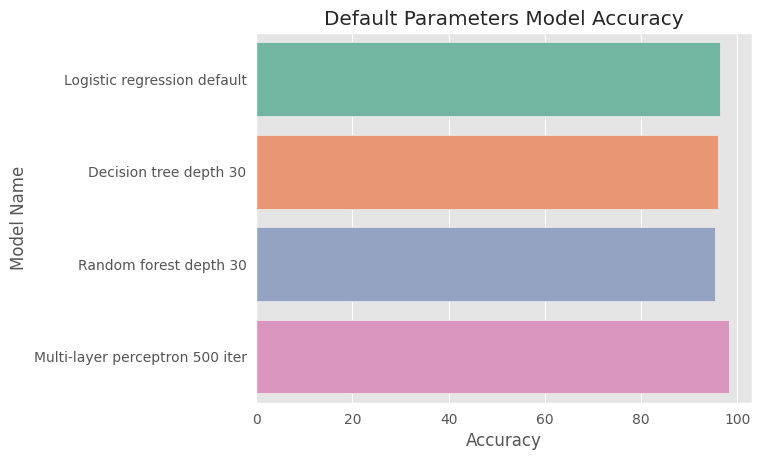

In [56]:
model = model.toPandas()
sns.barplot(y = "Model Name", x = "Accuracy", data = model, palette="Set2").set(title="Default Parameters Model Accuracy")
plt.show()

In [57]:
model_1 = spark.createDataFrame([("Logistic regression", accuracy_LogisticRegression*100),
                               ("Decision tree", accuracy_RandomForest_2*100),
                               ("Random forest", accuracy_RandomForest_2*100),
                               ("Multi-layer perceptron", accuracy_MultilayerPerceptron_1*100)], ["Model Name","Accuracy"])
model_1.toPandas()

,Model Name,Accuracy
0,Logistic regression,96.509773
1,Decision tree,99.986668
2,Random forest,99.986668
3,Multi-layer perceptron,99.351639


<ipython-input-58-9cf5c1e00eb3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = "Model Name", x = "Accuracy", data = model_1, palette="Set2").set(title="Highest Model Accuracy")


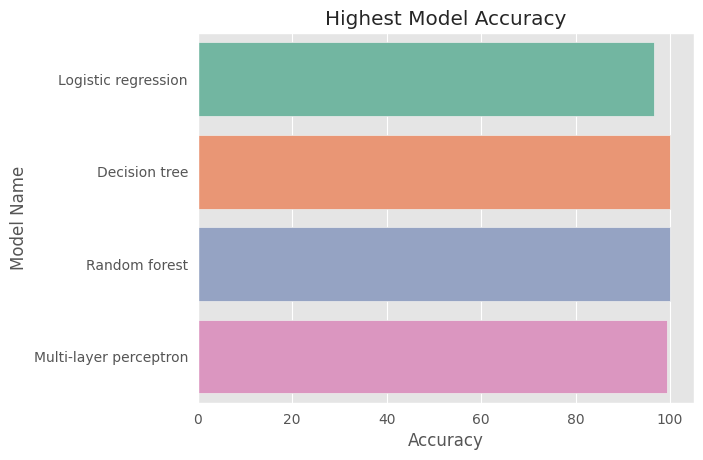

In [58]:
model_1 = model_1.toPandas()
sns.barplot(y = "Model Name", x = "Accuracy", data = model_1, palette="Set2").set(title="Highest Model Accuracy")
plt.show()

In [59]:
model_2 = spark.createDataFrame([("Logistic regression Ridge", accuracy_LogisticRegression_2*100),
                               ("Decision tree depth 0", accuracy_RandomForest_3*100),
                               ("Random forest depth 0", accuracy_RandomForest_3*100),
                               ("Multi-layer perceptron 3 hidden layers(16, 8, 4)", accuracy_MultilayerPerceptron_5*100)], ["Model Name","Accuracy"])
model_2.toPandas()

,Model Name,Accuracy
0,Logistic regression Ridge,94.138047
1,Decision tree depth 0,33.285786
2,Random forest depth 0,33.285786
3,"Multi-layer perceptron 3 hidden layers(16, 8, 4)",63.145218


<ipython-input-60-301be1de1957>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = "Model Name", x = "Accuracy", data = model_2, palette="Set2").set(title="Lowest Model Accuracy")


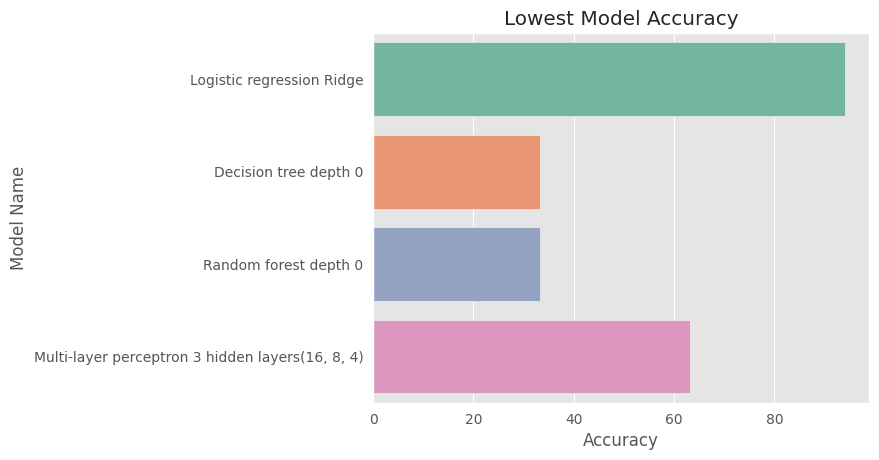

In [60]:
model_2 = model_2.toPandas()
sns.barplot(y = "Model Name", x = "Accuracy", data = model_2, palette="Set2").set(title="Lowest Model Accuracy")
plt.show()